https://colab.research.google.com/drive/1Dsyd5zB23upbCRDxlrh_r1P1wIlILCEa#scrollTo=7SZOQurK6420 Notebook for Sentiment Classification

https://humboldt-wi.github.io/blog/research/information_systems_1718/05sentimentanalysis/   Reference

Code from "My Study" youtube channel

In [6]:
import tensorflow as tf
import numpy as np

In [4]:
from keras.datasets import imdb

Using TensorFlow backend.


In [7]:
print('Loading the IMDB dataset...')
(x_train, y_train), (x_test, y_test) = imdb.load_data()
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print()

# summarize the number of classes by printing the unique class values.
print("Classes: ")
print(np.unique(y_train))
print()

# print a review from the Keras IMDB dataset
print("Keras IMDB Review-Example:")
print(x_train[0])
print()

Loading the IMDB dataset...
25000 train sequences
25000 test sequences

Classes: 
[0 1]

Keras IMDB Review-Example:
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 3

In [20]:
imdb.load_data()

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [21]:
# show the first 10 words to know what the most frequent words of the dataset are
# index/word mapping
index = imdb.get_word_index()
index2word = {v: k for k, v in index.items()}

index_arr = sorted(index, key=index.get)
index_arr[:10] # first 10 words

1646592/1641221 [==============================] - 0s 0us/step


['the', 'and', 'a', 'of', 'to', 'is', 'br', 'in', 'it', 'i']

In [25]:
print("Number of words: ")
print(len(np.unique(np.hstack(x_train))))
print ()

# print the average review length
print("Average review length:")
result = [len(x) for x in x_train]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

Number of words: 
88585

Average review length:
Mean 238.71 words (176.493674)


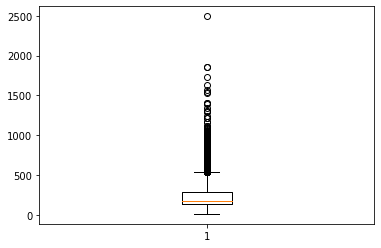

In [27]:
# with matplotlib we can plot a boxplot to show the review length in words
import matplotlib.pyplot as plt

plt.boxplot(result)
plt.show()


In [32]:
import nltk
from nltk import vectorizer

ImportError: ignored

In [34]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
vocabulary = DictVectorizer()
coef = LogisticRegression.coef_
word_importances = pd.DataFrame({'word': vocabulary, 'coef': coef.tolist()[0]})
word_importances_sorted = word_importances.sort_values(by='coef', ascending = False)
word_importances_sorted[:10]

AttributeError: ignored

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [43]:
data_yelp = pd.read_csv('Review1.csv', header=None)

In [44]:
data_yelp.head()
# review and sentiment
# 0-Negative, 1-Positive for positive review

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0.0
1,Not sure who was more lost - the flat characte...,0.0
2,Attempting artiness with black & white and cle...,0.0
3,Very little music or anything to speak of.,0.0
4,The best scene in the movie was when Gerardo i...,1.0


In [45]:
# Assign column names
columan_name = ['Review', 'Sentiment']
data_yelp.columns = columan_name

In [46]:
data_yelp.head()

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0.0
1,Not sure who was more lost - the flat characte...,0.0
2,Attempting artiness with black & white and cle...,0.0
3,Very little music or anything to speak of.,0.0
4,The best scene in the movie was when Gerardo i...,1.0


In [47]:
data_yelp.shape
# 1000 rows (reviews), 2 columns (Sentiments)

(1000, 2)

Here feature is used which is used to drop the null examples present in the dataset, if we don't use it the it will give error at the time of fitting the dataset. Link to explore more about it https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe#:~:text=Pandas%20DataFrame%20dropna()%20function%20is%20used%20to%20remove%20rows,NaT%2C%20and%20numpy.

In [77]:
data = data_yelp.dropna(thresh=2)

In [78]:
data['Sentiment'].value_counts()

0.0    500
1.0    495
Name: Sentiment, dtype: int64

In [79]:
# check for null values
data.isnull().sum()

Review       0
Sentiment    0
dtype: int64

In [80]:
data.shape

(995, 2)

In [81]:
data.isnull()

,Review,Sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
995,False,False
996,False,False
997,False,False
998,False,False


In [82]:
data.shape

(995, 2)

In [83]:
x = data['Review']
y = data['Sentiment']

In [84]:
import string

In [85]:
punct = string.punctuation

In [86]:
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [87]:
from spacy.lang.en.stop_words import STOP_WORDS

In [88]:
stopwords = list(STOP_WORDS) # list of stopwords

In [89]:
def text_data_cleaning(sentence):
  doc = nlp(sentence)

  tokens = [] # list of tokens
  for token in doc:
    if token.lemma_ != "-PRON-":
      temp = token.lemma_.lower().strip()
    else:
      temp = token.lower_
    tokens.append(temp)
 
  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords and token not in punct:
      cleaned_tokens.append(token)
  return cleaned_tokens

In [90]:
text_data_cleaning("Hello all, It's a beautiful day outside there!")
# stopwords and punctuations removed

['hello', 'beautiful', 'day', 'outside']

In [91]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [92]:
tfidf = TfidfVectorizer(tokenizer=text_data_cleaning)
# tokenizer=text_data_cleaning, tokenization will be done according to this function

In [93]:
classifier = LinearSVC()

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [95]:
x_train.shape, x_test.shape
# 2198 samples in training dataset and 550 in test dataset

((796,), (199,))

In [96]:
x_train.head()

869    At around 4 pm I bought it, at around 8pm I st...
879                       Dee Snider just plain sucks.  
883    This film tries to be a serious and sophistica...
114               The directing seems too pretentious.  
612    The characters are interesting and you want to...
Name: Review, dtype: object

In [97]:
clf = Pipeline([('tfidf',tfidf), ('clf',classifier)])
# it will first do vectorization and then it will do classification

In [98]:
clf.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function text_data_cleaning at 0x7f4988b64f28>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept

In [99]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [100]:
y_pred = clf.predict(x_test)

In [101]:
confusion_matrix(y_test, y_pred)

array([[66, 14],
       [30, 89]])

In [102]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.69      0.82      0.75        80
         1.0       0.86      0.75      0.80       119

    accuracy                           0.78       199
   macro avg       0.78      0.79      0.78       199
weighted avg       0.79      0.78      0.78       199



In [103]:
accuracy_score(y_test, y_pred)
# 76% accuracy

0.7788944723618091

In [104]:
clf.predict(["Wow, I am learning Natural Language Processing in fun fashion!"])
# output is 1, that means review is positive

array([1.])

In [105]:
clf.predict(["It's hard to learn new things!"])
# output is 0, that means review is Negative

array([0.])

In [108]:
clf.predict(["I am not very happy today"])
# output is 0, that means review is Negative

array([1.])